In [1]:
import femshape2 as fem
#reload(fem)
import numpy as np
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
n = 5000
# Circle
t=np.linspace(0,2*np.pi,n,endpoint=False)
gamma1 = np.vstack((0.5*np.cos(t),0.5*np.sin(2*t))).T
#gamma1 = np.vstack((0.5*np.cos(t),0.5*np.sin(t))).T    
error = np.zeros((8,4,2))
count = 0
for m in [1,2,4,8,16,32,64,128]:
    count += 1
    for o in range(4):
        shapecalc = fem.FEMShapeInvariant(order=o+1, meshsize=m,L=1)
        inv1 = shapecalc.compute_invariants(gamma1,closed=True)
        #inv1 = shapecalc.compute_invariants(gamma1,closed=False)
        x, y, H1, H2 = shapecalc.calcM()
        error[count-1,o,0] = H1
        error[count-1,o,1] = H2


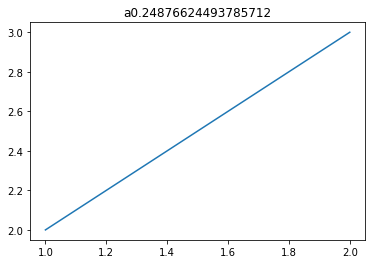

In [4]:
fig = pl.figure()
pl.title('a'+str(error[0,0,0]))
pl.plot([1,2],[2,3])

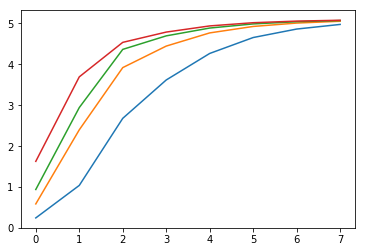

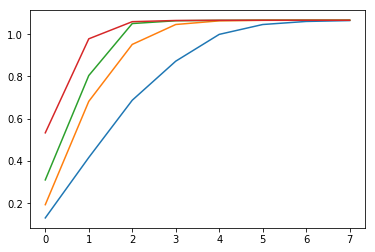

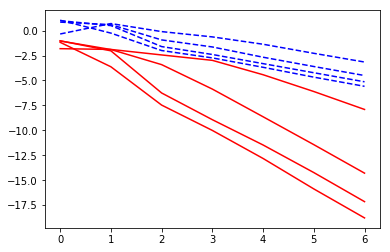

In [5]:

pl.figure()
for i in range(4):
    pl.plot(range(8),error[:,i,0])

pl.figure()
for i in range(4):
    pl.plot(range(8),error[:,i,1])
    
pl.figure()
for i in range(4):
    pl.plot(range(7),np.log2(error[1:,i,0] - error[:7,i,0]),'b--')
    pl.plot(range(7),np.log2(error[1:,i,1] - error[:7,i,1]),color='r')
    

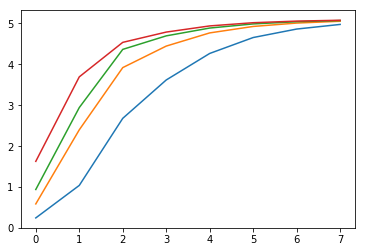

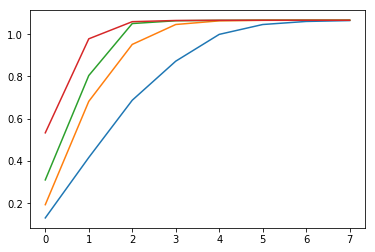

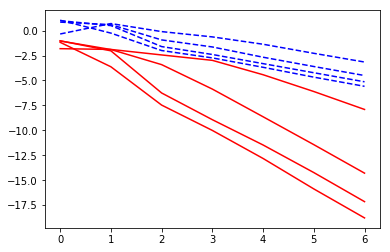

In [6]:
pl.figure()
for i in range(4):
    pl.plot(range(8),error[:,i,0])

pl.figure()
for i in range(4):
    pl.plot(range(8),error[:,i,1])
    
pl.figure()
for i in range(4):
    pl.plot(range(7),np.log2(error[1:,i,0] - error[:7,i,0]),'b--')
    pl.plot(range(7),np.log2(error[1:,i,1] - error[:7,i,1]),color='r')

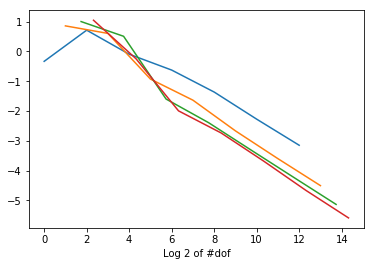

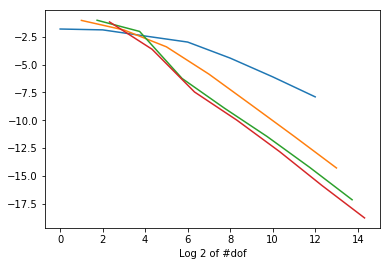

In [7]:
pl.figure()
for i in range(4):
    pl.plot(np.log2((i+2)*(i+3)/6.0)+range(0,14,2),np.log2(error[1:,i,0] - error[:7,i,0]))
pl.xlabel('Log 2 of #dof')

pl.figure()
for i in range(4):
    pl.plot(np.log2((i+2)*(i+3)/6.0)+range(0,14,2),np.log2(error[1:,i,1] - error[:7,i,1]))
pl.xlabel('Log 2 of #dof')

Unimportant:
plot the mesh on the representer figures
figure labels on the graph lines (in latex)

reparam-invariance
    smooth reparam
    randomize
    
important:
decide what to actually show
what comparison with matlab?

same random shapes as previously (note same rng in matlab and python)

2 random relatively similar shapes with lots of noisy versions (increasing noise) and show distance

reproduce Qiu & Glaunes shape figure (8) (pre-registered for similarity)

turn circle into square to see if corners have an effect

In [92]:
error[1:,0,0]-error[:7,0,0]

array([ 0.23590005,  1.66169656,  0.65169052,  0.40831762,  0.26332876,
        0.12891653,  0.07854382])